Note :This model is efficient for News Subjcts written below
#### politicsNews
#### worldnews
#### News
#### politics
#### left-news
#### Government News
#### US_News
#### Middle-east

# Import necessary dependencies

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from text to vector
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

#Models & Evaluations
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix

# Loading Datasets

In [85]:
true_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")

In [86]:
true_news.head(n=2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [87]:
fake_news.head(n=2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


# Combine True & Fake Data

In [88]:
# Before Combination of data let's check some necessary things

true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [89]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [90]:
true_news.drop("date", inplace=True, axis=1)
fake_news.drop("date", inplace=True, axis=1)

In [91]:
true_news['label'] = 1

In [92]:
fake_news['label'] = 0

In [93]:
print(true_news.shape)
print(fake_news.shape)

(21417, 4)
(23481, 4)


In [94]:
#Lets combine both the dataset

final_ds = pd.concat([true_news, fake_news], ignore_index=True)

In [95]:
final_ds.shape

(44898, 4)

In [96]:
shuffled_df = final_ds.sample(frac=1).reset_index(drop=True)

In [97]:
shuffled_df.head()

,title,text,subject,label
0,Americans should hear both from Comey and Trum...,WASHINGTON (Reuters) - The head of the Senate ...,politicsNews,1
1,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,Here s one sure way to turn a solidly red st...,Government News,0
2,VOTING MACHINES STOLEN In Controversial GA Ele...,"SANDY SPRINGS, Ga., April 18 (Reuters) For U...",left-news,0
3,REFS WALK OFF IN PROTEST After High School Pla...,"TWO PATRIOTS WALK:The officials, Ernie Lunarde...",left-news,0
4,Al Shabaab bomb kills 12 in Somalia's Puntland,"BOSSASO, Somalia (Reuters) - An al Shabaab bom...",worldnews,1


In [98]:
shuffled_df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [99]:
left_news = shuffled_df[shuffled_df['subject'] == 'US_News']['title']
left_news_arr = pd.array(left_news)
left_news_arr[0:10]

<NumpyExtensionArray>
[                     'Professor: Political Ignorance is “Going To Have Consequences”',
     'BOMBSHELL: Clinton WikiLeak Exposes Entire ‘Shadow Government’ – Jay Dyer (Vid)',
                       'MASS INTEGRATION:  The Race to Capitalize on a Virtual Future',
 'Henningsen: ‘Trump Challenging Sacred Cows of US Foreign Policy, But for How Long?’',
                                 'BOILER ROOM – Presidential Debate Simulcast Special',
                        'Boiler Room EP #112 – UK Election, Omran & Technocratic Tech',
                     'FBI REDUX: What’s Behind New Probe into Hillary Clinton Emails?',
      'Globalization’s Inside Man: The Problem with David Petraeus in Trump’s Cabinet',
                                  'Shaquille O’Neal: “The Earth is flat. Yes, it is.”',
  'Boiler Room EP #122 – Charlottesville & The History of Violent Cultural Revolution']
Length: 10, dtype: object

# Cleaning Data

In [100]:
stop_words = set([
    'the', 'is', 'in', 'and', 'to', 'with', 'a', 'an', 'of', 'for', 'on', 'at',
    'by', 'this', 'that', 'are', 'was', 'it', 'be', 'as', 'from', 'or', 'has',
    'have', 'had', 'but', 'not', 'he', 'she', 'they', 'you', 'we', 'his', 'her'
])

In [101]:
# Removing URL, Hashtags, newline characters, punctuations, whitespace, emoji ranges, 

def clean_data(text) :
    Cltext = re.sub('https\S+', ' ', text) #links
    Cltext = re.sub('@', ' ', Cltext) #mentions
    Cltext = re.sub('\n', ' ', Cltext) #newline
    Cltext = re.sub('\r', ' ' , Cltext) #carriage returns
    Cltext = re.sub(r'[^\w\s]', ' ', Cltext) #Punctuations
    Cltext = re.sub(r"[\u2600-\u26FF\u2700-\u27BF]+", ' ', Cltext) #Emoji ranges
    Cltext = re.sub('\s+', ' ', Cltext).strip() #extra whitespace
    Cltext = re.sub('_', ' ', Cltext)
    Cltext = re.sub("'", ' ', Cltext)

    #Lowercase from consistent case removal
    Cltext = Cltext.lower()

    words = Cltext.split()
    cleaned_words = [word for word in words if word not in stop_words]

    return ' '.join(cleaned_words)

original_resume = """
My name is Alex, find me @alex_datasci or https://alex.codes.
I am a 📊 Data Scientist.
I love Python and Machine Learning.
"""

cleaned = clean_data(original_resume)
print(cleaned)

my name alex find me alex datasci i am data scientist i love python machine learning


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gajja\AppData\Local\Temp\ipykernel_3976\780256030.py:4: SyntaxWarning: invalid escape sequence '\S'
  Cltext = re.sub('https\S+', ' ', text) #links
C:\Users\gajja\AppData\Local\Temp\ipykernel_3976\780256030.py:10: SyntaxWarning: invalid escape sequence '\s'
  Cltext = re.sub('\s+', ' ', Cltext).strip() #extra whitespace


In [102]:
shuffled_df.head(2)

,title,text,subject,label
0,Americans should hear both from Comey and Trum...,WASHINGTON (Reuters) - The head of the Senate ...,politicsNews,1
1,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,Here s one sure way to turn a solidly red st...,Government News,0


In [103]:
shuffled_df['full_data'] = shuffled_df['title'] + " " + shuffled_df['text']

In [104]:
shuffled_df.head(2)

,title,text,subject,label,full_data
0,Americans should hear both from Comey and Trum...,WASHINGTON (Reuters) - The head of the Senate ...,politicsNews,1,Americans should hear both from Comey and Trum...
1,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,Here s one sure way to turn a solidly red st...,Government News,0,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...


In [105]:
# Let's Clean the data

shuffled_df['cleaned_data'] = shuffled_df['full_data'].apply(lambda x : clean_data(x))

In [106]:
shuffled_df['cleaned_data'][0]

'americans should hear both comey trump republican panel chairman washington reuters head senate intelligence committee said thursday americans deserved hear both former fbi chief james comey president donald trump investigations proceed into alleged russian meddling 2016 u s presidential election american people need hear your side story just need hear president s description events panel s republican chairman richard burr said will establish facts separate rampant speculation lay them out american people make their own judgment said'

# Converting Data into Vector format

In [107]:
X = shuffled_df['cleaned_data']
y = shuffled_df['label']

In [108]:
tfid = TfidfVectorizer(stop_words='english', max_features=20000)

In [109]:
X_vec = tfid.fit_transform(X)

In [110]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [111]:
print(f"X training : {X_train.shape}")
print(f"X testing : {X_test.shape}")
print(f"y training : {y_train.shape}")
print(f"y testing : {y_test.shape}")

X training : (35918, 20000)
X testing : (8980, 20000)
y training : (35918,)
y testing : (8980,)


# Using a best model

In [112]:
models = {
    'LR' : LogisticRegression(),
    'DTC' : DecisionTreeClassifier(),
    'RC' : RidgeClassifier(),
    'RFC' : RandomForestClassifier(),
    'KNN' : KNeighborsClassifier(),
}

--- LR ---
Train Accuracy: 0.9925
Test Accuracy: 0.9855

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4737
           1       0.98      0.99      0.98      4243

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:


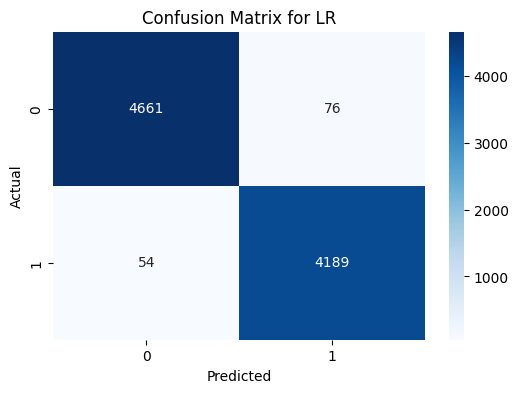

--------------------------------------------------
--- DTC ---
Train Accuracy: 1.0000
Test Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4737
           1       1.00      1.00      1.00      4243

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:


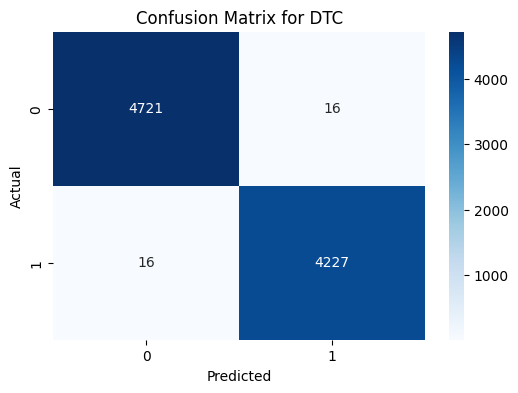

--------------------------------------------------
--- RC ---
Train Accuracy: 0.9985
Test Accuracy: 0.9933

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4737
           1       0.99      0.99      0.99      4243

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:


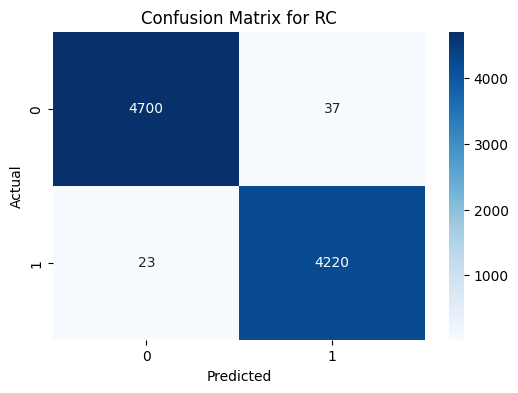

--------------------------------------------------
--- RFC ---
Train Accuracy: 1.0000
Test Accuracy: 0.9969

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4737
           1       1.00      1.00      1.00      4243

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:


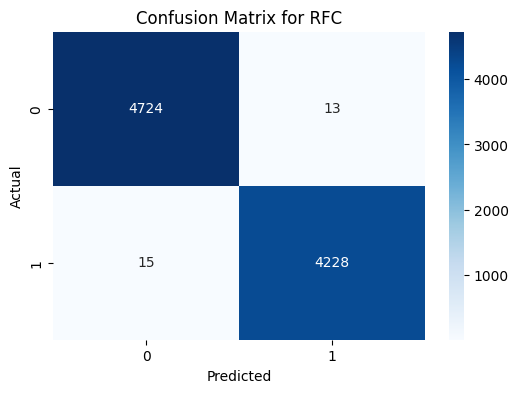

--------------------------------------------------
--- KNN ---


MemoryError: Unable to allocate 980. MiB for an array with shape (128499426,) and data type float64

In [113]:
for name, model in models.items():
    # --- Training ---
    model.fit(X_train, y_train)
    print(f'--- {name} ---')

    # --- Make Predictions ---
    y_pred = model.predict(X_test)

    # --- Accuracy Scores (from your original code) ---
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f'Train Accuracy: {train_acc:.4f}')
    print(f'Test Accuracy: {test_acc:.4f}\n')

    # --- Classification Report ---
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # --- Confusion Matrix ---
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    print("-" * 50)

# Found the best model with best accuracy

In [114]:
RC = RidgeClassifier()
RC.fit(X_train, y_train)

RidgeClassifier()

In [115]:
y_pred = RC.predict(X_test)

In [116]:
test_acc = RC.score(X_test, y_test)

In [117]:
train_acc = RC.score(X_train, y_train)

In [118]:
print(f"Train Accuracy : {train_acc} && Test Accuracy : {test_acc}")

Train Accuracy : 0.9984965755331588 && Test Accuracy : 0.9933184855233853


In [119]:
print(f"{confusion_matrix(y_test, y_pred)}")

[[4700   37]
 [  23 4220]]


In [120]:
print(f"{classification_report(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4737
           1       0.99      0.99      0.99      4243

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [121]:
# new_data = ["In a revelation that upends centuries of archaeological consensus, newly leaked documents from a joint NASA-Egyptian Ministry of Antiquities project allegedly confirm that the Great Pyramids of Giza were not built as tombs for the pharaohs, but as massive wireless power plants. The documents, reportedly leaked by a whistleblower within the space agency, contain advanced geothermal and satellite imaging data showing high concentrations of quartz crystal and dolomite within the pyramid's granite structure. These materials, when subjected to the immense pressure from the pyramid's mass, would create a powerful piezoelectric effect, generating significant electrical energy from the earth itself. According to the files, the internal shafts, previously thought to be for ventilation or spiritual purposes, were perfectly aligned to channel these telluric currents towards a now-missing capstone, which would have broadcast the energy wirelessly. The findings suggest the ancient Egyptians had mastered principles of wireless energy that even Nikola Tesla only dreamed of, read a notation attributed to a project scientist in the leaked report. Officials from both NASA and the Egyptian government have refused to comment on the documents, calling them a complete fabrication. However, proponents of the ancient technology theory say this is just further proof of a massive historical cover-up designed to protect established narratives and suppress knowledge of free energy."]
new_data  = ["India Becomes First Country to Land Near Moon's South Pole, In a historic achievement, India’s Chandrayaan-3 mission successfully landed near the Moon’s south pole on August 23, 2023, making India the first nation to reach this unexplored lunar region. The Vikram lander touched down safely at 6:04 PM IST, sending celebrations across the country and the global space community. The mission, developed by the Indian Space Research Organisation (ISRO), aims to explore the lunar surface and conduct scientific experiments, especially in areas that may contain water ice. Scientists believe this could be critical for future human missions to the Moon.Prime Minister Narendra Modi called it a moment of pride and inspiration for every Indian, highlighting India's growing space capabilities on the global stage."]
X_new = tfid.transform(new_data)

# prediction = RC.predict(X_new)
# print("Prediction:", "Real" if prediction[0] == 1 else "Fake")

In [125]:
data_title = "Biden Administration Cancels $9 Billion in Student Loan Debt"

data_text = "In a significant move to address the student debt crisis, the Biden administration announced on October 4, 2023, that it would cancel $9 billion in federal student loans for approximately 125,000 borrowers. The debt relief targets individuals enrolled in income-driven repayment plans, the Public Service Loan Forgiveness program, and those with permanent disabilities. According to the U.S. Department of Education, this latest round of forgiveness builds upon earlier efforts to streamline the loan system and offer targeted relief after the Supreme Court struck down the broader loan cancellation proposal earlier this year. President Joe Biden emphasized that his administration remains committed to delivering relief through lawful executive actions. The announcement has been praised by education advocates but has also drawn criticism from some fiscal conservatives concerned about the long-term financial impact."

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data_text = clean_text(data_title + " " + data_text)

vect = tfid.transform([data_text])

y_pred = RC.predict(vect)

if( y_pred == 0 ) : 
    print("Fake News")
else : 
    print("Real News")

Real News


In [126]:
import pickle

pickle.dump(RC, open('News_Predictor_model_RidgeClassifier_.pkl', 'wb'))

In [127]:
pickle.dump(tfid, open('tfid_Text_vectorizer.pkl', 'wb'))